# Data Science Project Proposal: 
## A deep dive into football

Abhishek Purwaha 46435255 
Cameron Warton 44635931 
Jack Reynolds 44635206
Zahin Sobhan Enan 46247165


The search for the best quantitative statistic for measuring a players contribution to a game
Questions:

##### 1) Whats the most important traditional statistics and why they arent a good reflection of a players contribution 

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE


#### the api request will only allow 20 rows max, so im combining the top 100 for a better sample size

In [2]:
headers = {
    'accept': 'application/json',
    'X-AUTH-TOKEN': '081859a6-a132-48ca-8324-ae72614e97e9',
}

response1 = requests.get('https://futdb.app/api/players', headers=headers)
response2 = requests.get('https://futdb.app/api/players?page=2', headers=headers)
response3 = requests.get('https://futdb.app/api/players?page=3', headers=headers)
response4 = requests.get('https://futdb.app/api/players?page=4', headers=headers)
response5 = requests.get('https://futdb.app/api/players?page=5', headers=headers)

In [3]:
data1 = response1.json()
data2 = response2.json()
data3 = response3.json()
data4 = response4.json()
data5 = response5.json()


#### Just testing that this one works to extract a single data field

In [4]:
print(data1['items'][0]['name'])

Pelé


#### Inspecting data    
#### Lists all the names of the top 20 theoretically highest rated historical soccer players
#### Pele and Maradona occur twice, there seem to be the different variants of Pele and Maradona and thats based on the different rarities of their FIFA stats.

In [5]:
x=0
while x < 20:
    print(data1['items'][x]['name'])
    
    x+=1;


Pelé
Diego Maradona
Ronaldo
Zinedine Zidane
Diego Maradona
Pelé
Ronaldinho
Ronaldo
Zinedine Zidane
Ferenc Puskás
Johan Cruyff
Lev Yashin
Mané Garrincha
Paolo Maldini
Marcos Cafú
Franco Baresi
George Best
Lothar Matthäus
Marco van Basten
Roberto Baggio


#### Just testing the top 20 players to see what the stat distribution is like.
#### We can see that the goalkeeper 'Lev Yashin' has stats of zero which is an error and needs to be dropped
#### I tried re-fitting the stats but noticed the outfielder stats are way higher than goalkeepers and may skew the results. i may omit the goalkeeper results temporarily here and permanently later.

Total Pace:  1691 Average Pace:  89.0
Total Shooting:  1629 Average Shooting:  85.7
Total Passing:  1660 Average Passing:  87.4
Total Dribbling:  1721 Average Dribbling:  90.6
Total Defending:  1111 Average Defending:  58.5
Total Physicality:  1468 Average Physicality:  77.3


<BarContainer object of 6 artists>

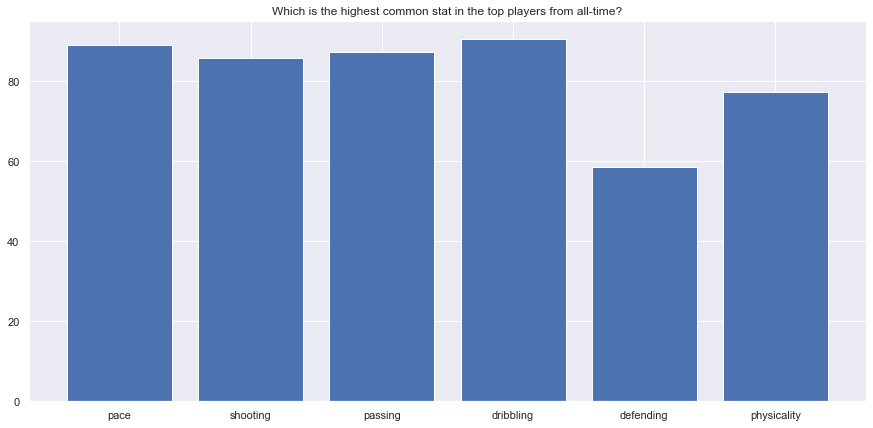

In [6]:
skillz = {'pace': 0, 'shooting': 0, 'passing': 0, 'dribbling': 0, 'defending': 0, 'physicality': 0}

x=0
while x < 20:
    skillz['pace'] += data1['items'][x]['pace']
    skillz['shooting'] += data1['items'][x]['shooting']
    skillz['passing'] += data1['items'][x]['passing']
    skillz['dribbling'] += data1['items'][x]['dribbling']
    skillz['defending'] += data1['items'][x]['defending']
    skillz['physicality'] += data1['items'][x]['physicality']
    x+=1;

print("Total Pace: ",skillz['pace'], "Average Pace: ", "{:.1f}".format(skillz['pace']/19))
print("Total Shooting: ",skillz['shooting'], "Average Shooting: ", "{:.1f}".format(skillz['shooting']/19))
print("Total Passing: ",skillz['passing'], "Average Passing: ", "{:.1f}".format(skillz['passing']/19))
print("Total Dribbling: ",skillz['dribbling'], "Average Dribbling: ", "{:.1f}".format(skillz['dribbling']/19))
print("Total Defending: ",skillz['defending'], "Average Defending: ", "{:.1f}".format(skillz['defending']/19))
print("Total Physicality: ",skillz['physicality'], "Average Physicality: ", "{:.1f}".format(skillz['physicality']/19))

skillz['pace'] = (skillz['pace'] / 19)
skillz['shooting'] = (skillz['shooting'] / 19)
skillz['passing'] = (skillz['passing'] / 19)
skillz['dribbling'] = (skillz['dribbling'] / 19)
skillz['defending'] = (skillz['defending'] / 19)
skillz['physicality'] = (skillz['physicality'] / 19)  
    
   
    
plt.figure(figsize=(15,7))
plt.title('Which is the highest common stat in the top players from all-time?')


keys = skillz.keys()
values = skillz.values()
plt.bar(keys, values)



#### We can see that generally pace, shooting, passing and dribbling are the most important leaving defenders out.
#### This method seems to be a little biased since there should be an equal amount of quality of players offensive and defensive.
#### Perhaps its easier to be objective about pure statistical things like speed someone runs (km/h) or how many goals they score.
#### For defenders, its hard to be objective about the quality of their defence apart from a percentage of tackles won.
#### How does someone quantify physicality?

In [7]:
df1 = pd.json_normalize(data1['items'])
df2 = pd.json_normalize(data2['items'])
df3 = pd.json_normalize(data3['items'])
df4 = pd.json_normalize(data4['items'])
df5 = pd.json_normalize(data5['items'])


#### connecting the 100 players together and dropping all the useless or unimportant columns

In [8]:
frames = [df1, df2, df3, df4, df5]
df1 = pd.concat(frames)
df1 = df1.drop(['resource_id', 'resource_base_id', 'fut_bin_id','fut_wiz_id','pace_attributes','shooting_attributes','passing_attributes', 'dribbling_attributes','defending_attributes','physicality_attributes','goalkeeper_attributes','goalkeeper_attributes','goalkeeper_attributes','total_stats_in_game','total_stats','rating_average'], axis=1)
df1

,id,name,age,first_name,last_name,common_name,height,weight,birth_date,league,...,foot,attack_work_rate,defense_work_rate,rating,pace,shooting,passing,dribbling,defending,physicality
0,13728,Pelé,81,None,None,Pelé,173,70,1940-10-23,2118,...,Right,High,Med,98,95,96,93,96,60,76
1,13729,Diego Maradona,61,None,None,Maradona,165,70,1960-10-30,2118,...,Left,High,Med,97,92,93,92,97,40,76
2,13730,Ronaldo,45,None,None,Ronaldo,183,78,1976-09-22,2118,...,Right,Med,Med,96,97,95,81,95,45,76
3,13731,Zinedine Zidane,49,None,None,Zidane,185,77,1972-06-23,2118,...,Right,Med,Med,96,85,92,96,95,75,86
4,13732,Diego Maradona,61,Diego,Maradona,Maradona,165,72,1960-10-30,2118,...,Left,High,Med,95,88,91,90,95,42,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,13794,Edwin van der Sar,51,None,None,van der Sar,197,83,1970-10-29,2118,...,Right,Med,Med,91,0,0,0,0,0,0
16,13795,Eusébio,79,Eusébio,da Silva Ferreira,Eusébio,175,76,1942-01-25,2118,...,Right,High,Med,91,93,93,88,90,42,74
17,13796,Robin van Persie,38,None,None,van Persie,183,0,1983-08-06,2118,...,Left,NA,NA,91,85,94,87,90,46,74
18,13797,Fernando Hierro Ruiz,53,None,None,Hierro,187,84,1968-03-23,2118,...,Right,Med,High,91,73,68,76,70,93,87


In [9]:
df1.info

<bound method DataFrame.info of        id                  name  age first_name          last_name  \
0   13728                  Pelé   81       None               None   
1   13729        Diego Maradona   61       None               None   
2   13730               Ronaldo   45       None               None   
3   13731       Zinedine Zidane   49       None               None   
4   13732        Diego Maradona   61      Diego           Maradona   
..    ...                   ...  ...        ...                ...   
15  13794     Edwin van der Sar   51       None               None   
16  13795               Eusébio   79    Eusébio  da Silva Ferreira   
17  13796      Robin van Persie   38       None               None   
18  13797  Fernando Hierro Ruiz   53       None               None   
19  13798       Fernando Torres   37       None               None   

    common_name  height  weight  birth_date  league  ...   foot  \
0          Pelé     173      70  1940-10-23    2118  ...  Ri

In [10]:
df1.describe()

,id,age,height,weight,league,nation,club,rarity,skill_moves,weak_foot,rating,pace,shooting,passing,dribbling,defending,physicality
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,13505.100000,53.920000,180.110000,73.000000,1992.220000,36.470000,105902.820000,12.830000,3.450000,3.620000,92.100000,80.530000,79.210000,79.220000,81.880000,54.200000,73.530000
std,2291.532038,15.331146,7.252857,16.040983,500.371813,19.664075,26872.480116,8.270741,1.336171,1.042336,1.424887,21.506614,23.829061,21.453064,22.148845,24.837248,20.021935
min,512.000000,29.000000,165.000000,0.000000,13.000000,9.000000,9.000000,1.000000,0.000000,0.000000,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13749.750000,43.750000,174.750000,71.000000,2118.000000,21.000000,112658.000000,12.000000,3.000000,3.000000,91.000000,80.750000,80.000000,77.000000,82.000000,40.750000,72.750000
50%,13774.500000,49.000000,180.000000,75.000000,2118.000000,34.000000,112658.000000,12.000000,4.000000,4.000000,92.000000,86.000000,89.000000,86.000000,89.500000,45.500000,79.000000
75%,13799.250000,60.000000,186.000000,80.000000,2118.000000,52.000000,112658.000000,12.000000,4.000000,4.000000,93.000000,91.000000,92.000000,90.000000,92.000000,73.500000,83.000000
max,17589.000000,94.000000,197.000000,92.000000,2118.000000,111.000000,112658.000000,86.000000,5.000000,5.000000,98.000000,97.000000,96.000000,96.000000,97.000000,96.000000,92.000000


<AxesSubplot:xlabel='height', ylabel='rating'>

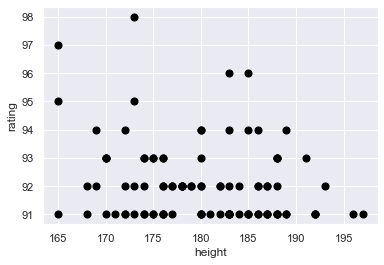

In [11]:
df1.plot(kind='scatter', x='height', y='rating', s=50, c='Black')

#### Trying out weight to rule out a correlation of physical weight.
#### obviously a weight of zero needs to be cleaned

<AxesSubplot:xlabel='weight', ylabel='rating'>

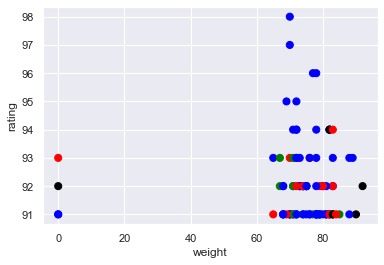

In [12]:
colours = {'RB':'red', 'CB':'red', 'LB':'red', 'RWB':'red', 'CDM':'red', 'LM':'green', 'RM':'green', 'CM':'green', 'LW':'blue', 'RW':'blue', 'GK':'black', 'CF':'blue', 'ST':'blue', 'CAM':'blue'}

df1.plot(kind='scatter', x='weight', y='rating', s=50, c=df1['position'].map(colours))

#### We see a strong correlation between skills moves and dribbling but more-so with shooting which is unexpected.
#### there is a -0.55 correlation between defending and skill moves, thats interesting to show that the better the defender is, the less time they work on skills.

In [13]:
df1.corr()

,id,age,height,weight,league,nation,club,rarity,skill_moves,weak_foot,rating,pace,shooting,passing,dribbling,defending,physicality
id,1.000000,0.150700,0.138536,-0.005714,0.469661,-0.040813,0.467806,0.291197,-0.038946,-0.060318,-0.101497,-0.004185,-0.067624,-0.050297,-0.058772,0.086241,0.033416
age,0.150700,1.000000,-0.240467,0.088718,0.343710,0.001031,0.343724,-0.128203,0.081656,0.164952,0.296300,-0.057617,-0.088735,-0.071657,-0.078560,-0.076169,-0.166632
height,0.138536,-0.240467,1.000000,0.312121,0.057037,-0.208023,0.056392,0.100843,-0.280327,0.030971,-0.241517,-0.430231,-0.352326,-0.452442,-0.442773,-0.116474,-0.212350
weight,-0.005714,0.088718,0.312121,1.000000,-0.057824,-0.053702,-0.058030,0.063497,0.403409,0.665745,0.003094,-0.019061,0.029174,-0.009041,-0.020015,0.018102,0.052900
league,0.469661,0.343710,0.057037,-0.057824,1.000000,-0.193376,0.999980,-0.393910,-0.136319,-0.051800,0.017338,-0.047111,-0.129287,-0.074390,-0.106511,0.153744,-0.014214
nation,-0.040813,0.001031,-0.208023,-0.053702,-0.193376,1.000000,-0.192079,-0.125893,0.214460,0.031471,0.148997,0.189623,0.140682,0.083749,0.153547,-0.175452,0.035356
club,0.467806,0.343724,0.056392,-0.058030,0.999980,-0.192079,1.000000,-0.398671,-0.136208,-0.051946,0.017792,-0.046895,-0.129195,-0.074325,-0.106461,0.153687,-0.014413
rarity,0.291197,-0.128203,0.100843,0.063497,-0.393910,-0.125893,-0.398671,1.000000,0.070060,0.047500,-0.064541,0.001931,0.043337,0.024920,0.036335,-0.066608,0.028121
skill_moves,-0.038946,0.081656,-0.280327,0.403409,-0.136319,0.214460,-0.136208,0.070060,1.000000,0.675219,0.294452,0.570896,0.673053,0.625865,0.662965,-0.102876,0.340247
weak_foot,-0.060318,0.164952,0.030971,0.665745,-0.051800,0.031471,-0.051946,0.047500,0.675219,1.000000,0.155064,0.311423,0.371695,0.291069,0.336652,-0.054780,0.176246


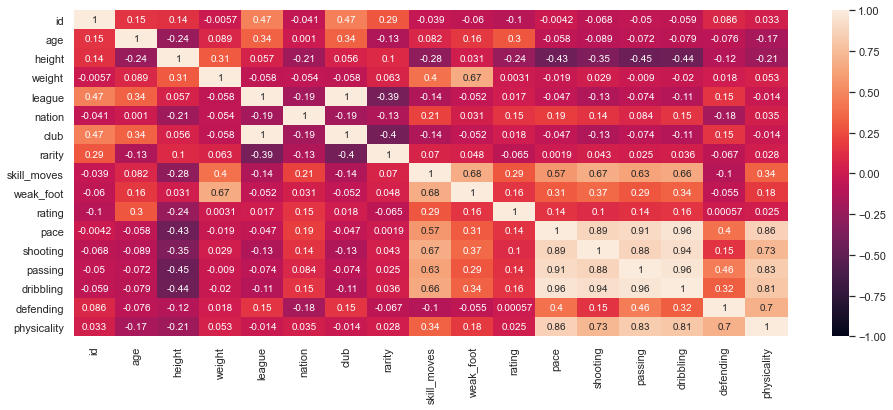

In [14]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

#### Iterate through df, if position = 'GK', we drop the row.
#### We need to drop the goalkeeper values
        

In [15]:
for index, row in df1.iterrows():
    if row['position'] == "GK":
        df1.drop(index, inplace=True)  
        
#Now to test if theres any left over        
for row in df1.itertuples():
    if row[16] == 'GK':
        print(row[2], row[16], '\n')        


Total Pace:  5961 Average Pace:  59.61
Total Shooting:  5863 Average Shooting:  58.63
Total Passing:  5891 Average Passing:  58.91
Total Dribbling:  6080 Average Dribbling:  60.8
Total Defending:  4125 Average Defending:  41.25
Total Physicality:  5496 Average Physicality:  54.96


<BarContainer object of 6 artists>

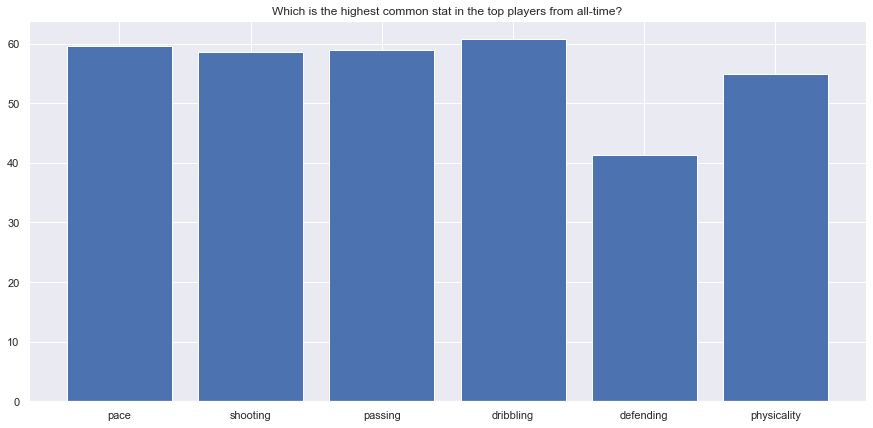

In [16]:
skillz = {'pace': 0, 'shooting': 0, 'passing': 0, 'dribbling': 0, 'defending': 0, 'physicality': 0}

skillz['pace'] = sum(df1['pace'])
skillz['shooting'] = sum(df1['shooting'])
skillz['passing'] = sum(df1['passing'])
skillz['dribbling'] = sum(df1['dribbling'])
skillz['defending'] = sum(df1['defending'])
skillz['physicality'] = sum(df1['physicality'])

print("Total Pace: ", skillz['pace'], "Average Pace: ", skillz['pace']/100)
print("Total Shooting: ",skillz['shooting'], "Average Shooting: ", skillz['shooting']/100)
print("Total Passing: ",skillz['passing'], "Average Passing: ", skillz['passing']/100)
print("Total Dribbling: ",skillz['dribbling'], "Average Dribbling: ", skillz['dribbling']/100)
print("Total Defending: ",skillz['defending'], "Average Defending: ", skillz['defending']/100)
print("Total Physicality: ",skillz['physicality'], "Average Physicality: ", skillz['physicality']/100)

skillz['pace'] = (skillz['pace'] / 100)
skillz['shooting'] = (skillz['shooting'] / 100)
skillz['passing'] = (skillz['passing'] / 100)
skillz['dribbling'] = (skillz['dribbling'] / 100)
skillz['defending'] = (skillz['defending'] / 100)
skillz['physicality'] = (skillz['physicality'] / 100)  
    

    
plt.figure(figsize=(15,7))
plt.title('Which is the highest common stat in the top players from all-time?')


keys = skillz.keys()
values = skillz.values()
plt.bar(keys, values)


not in commonPos  CAM
not in commonPos  ST
not in commonPos  CF
not in commonPos  LW
not in commonPos  RW
not in commonPos  CB
not in commonPos  RB
not in commonPos  CM
not in commonPos  RM
not in commonPos  CDM
not in commonPos  LB


<BarContainer object of 12 artists>

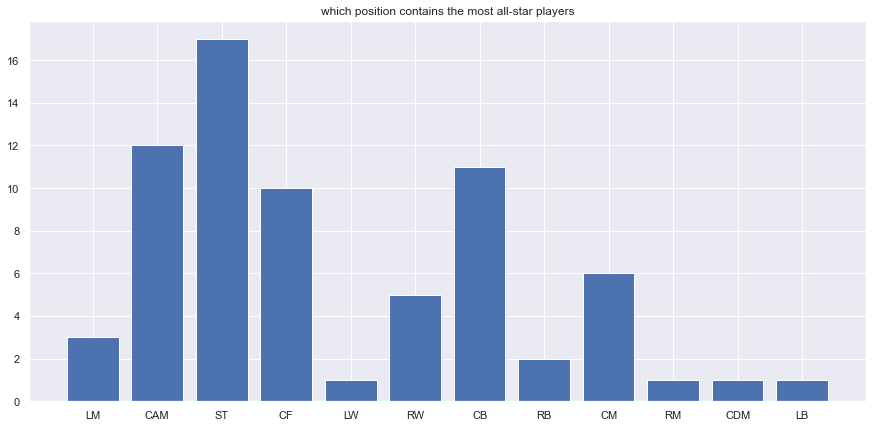

In [17]:
commonPos = {'LM' : 0}    
    
for index, row in df1.iterrows():
    if row['position'] not in commonPos:
        commonPos[row['position']] = 1
        print("not in commonPos ", row['position'])   
    elif row['position'] in commonPos:
        commonPos[row['position']] += 1
        
commonPos 
plt.figure(figsize=(15,7))
plt.title('which position contains the most all-star players')
keys = commonPos.keys()
values = commonPos.values()
plt.bar(keys, values)


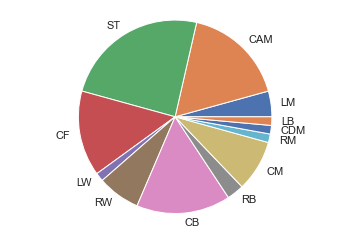

In [18]:
# Data to plot
labels = []
sizes = []

for x, y in commonPos.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

In [19]:
fifa_22 = pd.read_csv("files/fifa_22.csv")
fifa_21 = pd.read_csv("files/fifa_21.csv")
fifa_20 = pd.read_csv("files/fifa_20.csv")

C:\Users\Cameron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
print(fifa_22.shape), print(fifa_21.shape), print(fifa_20.shape)

(19239, 110)
(18944, 110)
(18483, 110)


(None, None, None)

In [21]:

f22 = fifa_22.drop(['player_positions','sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'], axis=1)
f21 = fifa_21.drop(['player_positions','sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'], axis=1)
f20 = fifa_20.drop(['player_positions','sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'], axis=1)


In [22]:
print(f20.shape), (f21.shape), (f21.shape)

(18483, 54)


(None, (18944, 54), (18944, 54))

In [23]:
f21.head()

,short_name,overall,potential,wage_eur,age,height_cm,weight_kg,club_name,league_name,league_level,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,93,93,560000.0,33,170,72,FC Barcelona,Spain Primera Division,1.0,...,94,44,40,93,95,75,96,32,35,24
1,Cristiano Ronaldo,92,92,220000.0,35,187,83,Juventus,Italian Serie A,1.0,...,93,63,29,95,82,84,95,28,32,24
2,R. Lewandowski,91,91,240000.0,31,184,80,FC Bayern München,German 1. Bundesliga,1.0,...,85,81,49,94,79,88,88,35,42,19
3,Neymar Jr,91,91,270000.0,28,175,68,Paris Saint-Germain,French Ligue 1,1.0,...,84,51,36,87,90,92,93,35,30,29
4,K. De Bruyne,91,91,370000.0,29,181,70,Manchester City,English Premier League,1.0,...,91,76,66,88,94,84,91,68,65,53


In [24]:
## There are multiple sub-positions within positions in FIFA. 
## An example of this is how Left wing backs, left backs, center backs, right center backs and right wing backs are all defenders.
##These sub-positions within positions make it hard to visualise graphs, so we categorised 3 general positions for easier visualisations

def label_pos (row):
    
    if(row.club_position == "RB" or row.club_position == "CB" or row.club_position == "LB" or 
       row.club_position == "LWB" or row.club_position == "RCB"or row.club_position == "RWB" or 
       row.club_position == "LCB"):
        return 'Defender'
    if(row.club_position == "RM" or row.club_position == "CM" or row.club_position == "LM"
       or row.club_position == "CAM" or row.club_position == "LDM" or row.club_position == "RDM"
      or row.club_position == "LAM"or row.club_position == "RAM" or row.club_position == "CDM"
       or row.club_position == "RCM"or row.club_position == "LCM"):
        return 'MidFielder'
    if(row.club_position == "RW" or row.club_position == "CF" or row.club_position == "LW" or 
       row.club_position == "ST" or row.club_position == "RS"or row.club_position == "LS"
       or row.club_position == "LF"or row.club_position == "RF"):
        return 'Forward'
 

f21['field_position'] = f21.apply (lambda row: label_pos(row), axis=1)

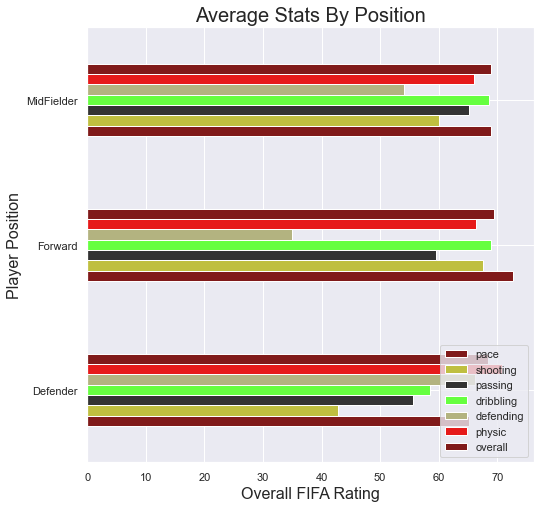

In [25]:
custom_colours = [(0.5,0.1,0.1), (0.75, 0.75, 0.25), (0.2,0.2,0.2), (0.4, 1, 0.25), (0.7,0.7,0.5), (0.9, 0.1, 0.1),]*5

ratingsByPositions = f21.groupby([f21['field_position']]).mean()
ratingsByPositions = ratingsByPositions
ratingsByPositions = ratingsByPositions[['pace','shooting','passing','dribbling','defending','physic','overall']]
ratingsByPositions.plot(kind='barh', figsize=(8,8), color=custom_colours)

plt.title('Average Stats By Position',fontsize=20)
plt.xlabel('Overall FIFA Rating',fontsize=16)
plt.ylabel('Player Position',fontsize=16);

#### The Above bar graph illustrates the average stats from the 3 main positions

#### Midfielders on average, have the highest stats and are more well rounded than forwards and defenders

#### Forwards are the fastest and possess the highest dribbling stats, although midfielders are not far behind

#### Defenders are the most physical of the 3 main positions, their shooting is significantly weaker in comparison to midfielders and forwards

#### This code prepares the following scatterplot by cleaning the data of irrelevant leagues 
#### which we do not want to be analysed

In [ ]:

for index, row in f21.iterrows():
     if row['league_name'] == "English League Two":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Danish Superliga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Saudi Abdul L. Jameel League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Liga de FÃºtbol Profesional Boliviano":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Colombian Liga PostobÃ³n":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Mexican Liga MX":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Polish T-Mobile Ekstraklasa":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Scottish Premiership":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "USA Major League Soccer":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Saudi Abdul L. Jameel League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Romanian Liga I":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "German 2. Bundesliga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Norwegian Eliteserien":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Swedish Allsvenskan":
        f21.drop(index, inplace=True)

for index, row in f21.iterrows():
     if row['league_name'] == "Australian Hyundai A-League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Korean K League 1":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Ecuadorian Serie A":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "German 3. Bundesliga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Chilian Campeonato Nacional":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Rep. Ireland Airtricity League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Chinese Super League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "French Ligue 2":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Greek Super League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "English League Championship":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Holland Eredivisie":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Portuguese Liga ZON SAGRES":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Japanese J. League Division 1":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Belgian Jupiler Pro League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Ukrainian Premier League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Croatian Prva HNL":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "English League One":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "South African Premier Division":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Finnish Veikkausliiga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Austrian Football Bundesliga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Swiss Super League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Czech Republic Gambrinus Liga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Italian Serie B":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "UAE Arabian Gulf League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Turkish Süper Lig":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Campeonato Brasileiro Série A":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Argentina Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Venezuelan Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Peruvian Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Paraguayan Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Uruguayan Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Colombian Liga Postobón":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Spanish Segunda División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Liga de Fútbol Profesional Boliviano":
        f21.drop(index, inplace=True)

In [ ]:
##Player ratings in each league

sns.scatterplot(data=f21, x="overall", y="field_position", hue="league_name")

plt.title('Average Player ratings in each league') #title
plt.xlabel('Overall FIFA 21 Rating') #x label
plt.ylabel('Position') #y label
plt.legend(title='League Name',loc='center', bbox_to_anchor=(1.25, 0.5),)


#### We can see that defenders in Spain are the weakest in the top 5 leagues
#### However, the Spanish league has the strongest midfielders in the top 5 leagues

In [ ]:
df = pd.read_csv("data.csv")
df.head()

In [ ]:

df.shape

In [ ]:
df.columns

#### Check the rows and columns of the Dataset
#### drop redundant columns
#### view dataframe summary

In [ ]:

df.info()

#### Skill Moves of Players

In [ ]:


plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Skill Moves', data = df, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

#### To show Different Work rate of the players participating in the FIFA 2019


In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('tableau-colorblind10')

sns.countplot(x = 'Work Rate', data = df, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

#### To show that there are people having same age
#### Histogram: number of players's age

In [ ]:
sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = df.Age
plt.figure(figsize = (15,8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

#### top 5 eldest players

In [ ]:
df.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality','Overall', 'Age' ]].head()

#### top 5 youngest players

In [ ]:
df.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age' ]].head()

#### top 5 Best Finishers

In [ ]:
df.sort_values(by = 'Finishing' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Finishing']].head()

#### top 5 fastest players

In [ ]:
df.sort_values(by = 'SprintSpeed' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','SprintSpeed']].head()

#### top 5 Best dribblers

In [ ]:

df.sort_values(by = 'Dribbling' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Dribbling']].head()

In [ ]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

In [ ]:
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391")

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

In [ ]:
fifa_22 = pd.read_csv("files/fifa_22.csv")
fifa_21 = pd.read_csv("files/fifa_21.csv")

In [ ]:
#cleaning the data by dropping columns that are not includeded in our analysis
f22 = fifa_22.drop(['player_positions','sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'player_tags', 'player_traits'], axis=1) 
f21 = fifa_21.drop(['player_positions','sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'player_tags', 'player_traits' ], axis=1) 

In [ ]:
#Discard GoalKeapers
for index, row in f21.iterrows():
     if row['club_position'] == "GK":
        f21.drop(index, inplace=True)

for index, row in f22.iterrows():
     if row['club_position'] == "GK":
        f22.drop(index, inplace=True)

In [ ]:
#fill Nan values as 0 
f21.fillna(0)
f22.fillna(0)

In [ ]:
print(f22.shape)
print(f21.shape)

### LINEAR  & MULTIPLE LINEAR REGRESSION MODEL

For our prediction model, we chose linear regression since as are predicting the player's overall rating, a numerical variable rather than categorial. We begin by fitting a simple linear regression model that uses one explanatory variable `potential` to predict our response variable `overall`

In [ ]:
reg = linear_model.LinearRegression()
X = f21[['potential']]
y = f21['overall']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

In [ ]:
reg.predict(X[:10])

In [ ]:
reg.predict(X[:5]) - y[:5]

##### Evaluation
To evaluate our model, we calculated the mean squared error for the original data as well as the R-squared metric. Mean squared error helps us understand how far on average are the original values of `overall` from our predicted values. $R^2$ metric helps us measure the variance of our data explained by our linear regression model

In [ ]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted) 
print("MSE:", mse)
print("R Squared:", r2)

To evaluate our model, we calculated the mean squared error for the original data as well as the R-squared metric. Mean squared error helps us understand how far on average are the original values of `overall` from our predicted values. $R^2$ metric helps us measure the variance of our data explained by our linear regression model

We can see that our simple linear regression model is able to make predictions on the overall rating from the player potential. However with a very high MSE & $R^2$ value of 0.39, our model is far from achieving the desired accuracy 

### Multiple Linear Regression
To improve our model, we add more explantory variables by picking columns from our dataset that we believe to be best suited to predicting the overall rating. Our data exploration helped us understand that player's attributes significantly affect their performance. And so we added the attribute columns `shooting`, `pace`, `passing`, `dribbling`, `defending` and `physic`. A player's age is also a siginificant determinant for predicting our overall rating. A younger player with high potential is likely to add many more points to their overall rating than a player above the age of 30. So we also added `age` to our model.

In [ ]:
#Our Regression model was unable to compute NaN values in the attributes columns. 
#So we filled 
f21['shooting'] = f21['shooting'].fillna(0)
f21['pace'] = f21['pace'].fillna(0)
f21['passing'] = f21['passing'].fillna(0)
f21['dribbling'] = f21['dribbling'].fillna(0)
f21['defending'] = f21['defending'].fillna(0)
f21['physic'] = f21['physic'].fillna(0)

In [ ]:
reg = linear_model.LinearRegression()
X = f21[['potential', 'age', 'shooting', 'pace', 'passing', 'dribbling', 'defending', 'physic']]
y = f21['overall']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

In [ ]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

We can see that adding the extra columns significantly improved the performance of our model. Our MSE lowered by a big margin, and even though it not as close to 1.0 as we would like, it is a major improvment. Our $R^2$ metric is now much closer to 1.0, showing that above 85% of our predicted data fits the regression model

#### Training & Testing 
After putting together our intial model, we want to evaluate how well our model would work on new data. To do this, we split our data into a 'training' set that tests on our 'test' set. We split 80% of our data into our training set and 20% into our test set

In [ ]:
train, test = train_test_split(f21, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

In [ ]:
reg = linear_model.LinearRegression()
X_train = train[['potential', 'age', 'shooting', 'pace', 'passing', 'dribbling', 'defending', 'physic']]
y_train = train['overall']

X_test = test[['potential', 'age', 'shooting', 'pace', 'passing', 'dribbling', 'defending', 'physic']]
y_test = test['overall']

reg.fit(X_train, y_train)

In [ ]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

### Artificial Neural Networks

To build a more sophisticated model, we employed the use of artifical neural networks. ANN is a deep learning mechanism attempts to simulate the network of neurons in the human brain to allow our model to learn and make better quality decisions in a humanlike manner. We will be using Multilayer Perecptron via the MLPClassifier python module. 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Splitting our data into a training and testing set for our MLPClassifier to use
train, test = train_test_split(f21, test_size=0.2, random_state=142)
X_train = train[['potential', 'age', 'shooting', 'pace', 'passing', 'dribbling', 'defending', 'physic']]
y_train = train['overall']
X_test = test[['potential', 'age', 'shooting', 'pace', 'passing', 'dribbling', 'defending', 'physic']]
y_test = test['overall']

In [ ]:
# Training the MLPClassifier
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

In [ ]:
#Evaluating Accuracy of MLP Classifier
test_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, test_predict)
print('Accuracy: %.4f \n' % accuracy)

In [ ]:
# Exploring MLP model's learning 
print('number of layers (inclusive of input layer): %.f\n' % clf.n_layers_)
print('MLP structure: %.f X %.f X %.f\n' % (X.shape[1], clf.get_params()['hidden_layer_sizes'][0], clf.n_outputs_))

In [ ]:
#Determining the accuracy range for our MLP model by using 10-fold cross validation
clf_mlp = MLPClassifier(hidden_layer_sizes=[50,50], random_state=42)
scores_mlp_2layers = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10, verbose=1)
print("Accuracy range for MLP with two hidden layers: [%.4f, %.4f]; mean: %.4f; std: %.4f\n" % (scores_mlp_2layers.min(), scores_mlp_2layers.max(), scores_mlp_2layers.mean(), scores_mlp_2layers.std()))